<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Avalia%C3%A7%C3%A3o_Op%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vectorbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [2]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mplfinance as mpf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_19_01.xlsx",)
Opções.tail(15)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
66,0.10,0.10,0.07,-0.0082,0.0,0.10,0.07,0.08,42.27,5.66,7.15,-0.85,6.72,0.0118,-0.93,6.17,5.87
67,0.08,0.09,0.06,-0.0075,0.0,0.08,0.06,0.07,42.52,5.90,7.38,-0.72,6.97,0.0127,-0.94,6.41,6.25
68,0.06,0.08,0.05,-0.0068,0.0,0.06,0.05,0.07,42.77,6.16,7.75,-7.22,7.22,0.0135,-0.95,6.64,0.00
69,0.06,0.07,0.05,-0.0062,0.0,0.06,0.05,0.06,43.02,0.00,0.00,-7.47,7.47,0.0143,-0.95,6.88,0.00
70,0.07,0.06,0.04,-0.0056,0.0,0.07,0.04,0.05,43.27,0.00,0.00,-7.72,7.72,0.0150,-0.96,7.11,0.00
71,0.06,0.05,0.04,-0.0050,0.0,0.06,0.03,0.05,43.52,0.00,0.00,-7.97,7.97,0.0156,-0.96,7.35,0.00
72,0.04,0.04,0.03,-0.0045,0.0,0.04,0.03,0.04,43.77,0.00,0.00,-8.22,8.22,0.0163,-0.97,7.59,0.00
73,0.04,0.04,0.03,-0.0041,0.0,0.04,0.03,0.04,44.02,0.00,0.00,-8.47,8.47,0.0168,-0.97,7.83,0.00
74,0.04,0.03,0.02,-0.0036,0.0,0.04,0.02,0.04,44.27,0.00,0.00,-8.72,8.72,0.0174,-0.98,8.07,0.00
75,0.07,0.03,0.02,-0.0032,0.0,0.07,0.02,0.03,44.52,0.00,0.00,-8.97,8.97,0.0179,-0.98,8.32,0.00


In [34]:
Opções1 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
Opções1.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,10.60,10.15,1.0,-0.0120,10.04,0.56,9.98,10.31,25.01,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
1,9.99,9.89,1.0,-0.0121,9.78,0.21,9.73,9.98,25.26,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
2,9.68,9.65,1.0,-0.0122,9.54,0.14,9.47,9.67,25.51,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
3,9.51,9.40,1.0,-0.0124,9.29,0.22,9.23,9.42,25.76,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
4,9.18,9.15,1.0,-0.0125,9.04,0.14,8.98,9.31,26.01,0.0,0.02,0.01,0.0,0.0,0.0,0.0,0.01


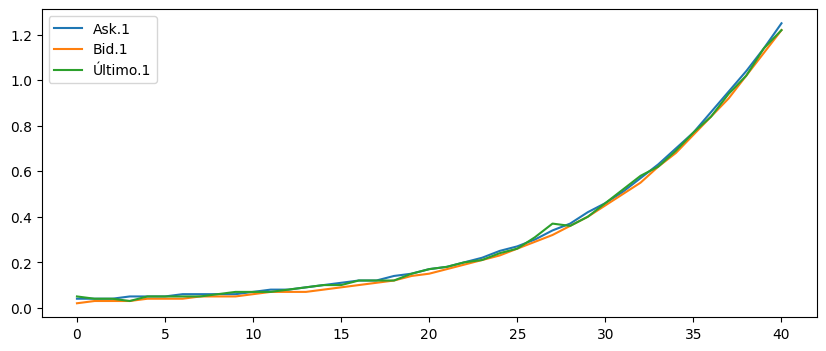

In [9]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0.5)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (10,4));

In [35]:
PUTs_OTM1 = Opções1[(Opções1['Intrínseco.1']<=0.5)]

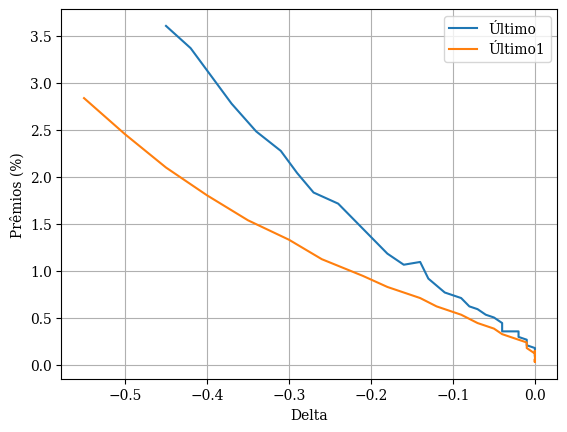

In [36]:
Ativo = 33.86
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Último.1']]*100/Ativo,label='Último')
plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='Último1')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()

In [19]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0.5)]

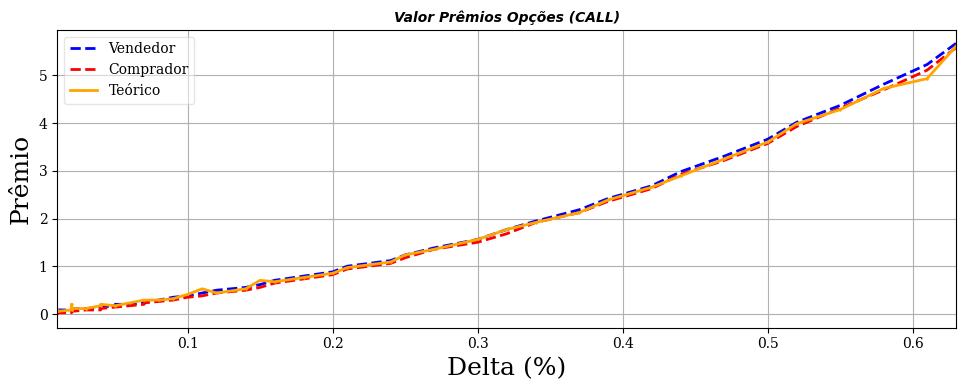

In [33]:
# A mesma análise para as Calls
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(10,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Último']*100/Ativo,  label='Teórico', color='orange', marker='+', linewidth=2, markersize=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()